In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


#definimos nuestras unidades
um = 1e-6 #micrometros
mm = 1e-3 #milimetros
nm= 1e-9 #nanometros


In [2]:
def Ojo(Uin, z1):
              
    Uin_fl=np.asarray(Uin,dtype=np.float32)
    
    
    FFT_imagen_1= np.fft.fft2(Uin_fl,norm="ortho")
    Uin_fft=np.fft.fftshift(FFT_imagen_1)
    
      
    pup=np.zeros(np.shape(Uin),dtype="uint8")
    
    r=int(1789/z1)
    
    M, N=Uin.shape
    
    coordx=int(N/2)
    coordy=int(M/2) 
    cv2.circle(pup,((coordx),(coordy)),r,1,-1) #Circulo
    
    Ul=Uin_fft*pup
    
    Uifft=np.fft.ifft2(Ul,norm="ortho")
    Uout = np.abs(Uifft)
                                  
    
    return Uout
    

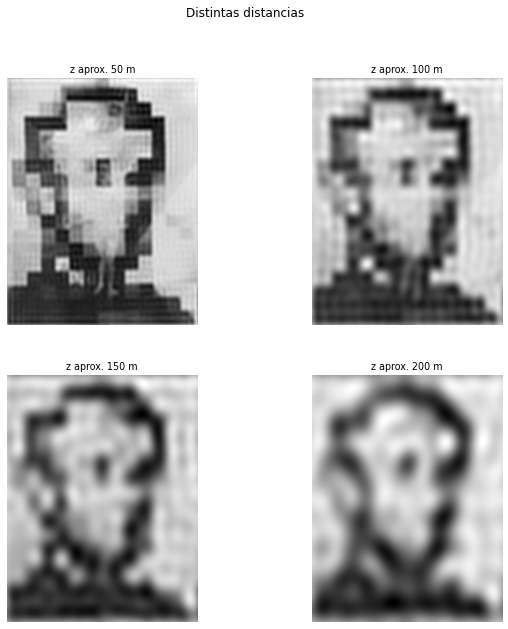

In [3]:
#carga la imágen
imagen_fuente_1 = cv2.imread('gala-desnuda-mirando.jpg',cv2.IMREAD_GRAYSCALE)


    
#preparar para desplegar resultados
f = plt.figure(figsize=(10,10))
ax1 = f.add_subplot(2,2, 1)
ax2 = f.add_subplot(2,2, 2)
ax3 = f.add_subplot(2,2, 3)
ax4 = f.add_subplot(2,2, 4)

f.suptitle("Distintas distancias",fontsize=12)

plt.rcParams.update({'font.size':8})

ax1.set_title("z aprox. 50 m")
ax1.imshow(Ojo(imagen_fuente_1, 50), cmap='gray')
#apagar ejes
ax1.axis('off')

ax2.set_title("z aprox. 100 m")
ax2.imshow(Ojo(imagen_fuente_1, 100), cmap='gray')
#apagar ejes
ax2.axis('off')

ax3.set_title("z aprox. 150 m")
ax3.imshow(Ojo(imagen_fuente_1, 150), cmap='gray')
#apagar ejes
ax3.axis('off')

ax4.set_title("z aprox. 200 m")
ax4.imshow(Ojo(imagen_fuente_1, 200), cmap='gray')
#apagar ejes
ax4.axis('off')

plt.show()
